# Probabilità classica

Esistono diverse definizioni di probabilità. Esistono diverse definizioni di probabilità. Una delle prima definizioni è dovuta a Pierre-Simon Laplace (Essai Philosophique sur les Probabilités, 1814):

<span style="color:blue">*“The theory of chance consists in reducing all the events of the same kind to a certain number of cases **equally possible**, that is to say, to such as we may be equally undecided about in regard to their existence, and in determining the number of cases favorable to the event whose probability is sought. The ratio of this number to that of all the cases possible is the measure of this probability, which is thus simply a fraction whose numerator is the number of favorable cases and whose denominator is the number of all the cases possible.”*</span>

In sostanza, per dispositivi dotati di particolari simmetrie la probabilità si ottiene da un'analisi combinatoria che calcola il numero di casi favorevori rispetto al numero totale di casi.

Questa definizione si applica bene ad alcuni casi notevoli, come lancio di dadi o monete, estrazione di carte da un mazzo, lotterie, ecc.

* [Un dato a 20 facce di epoca romana, musée du Louvre](https://www.photo.rmn.fr/C.aspx?VP3=SearchResult_VPage&STID=2C6NU08Y7VQF)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Registriamo tutte le combinazioni possibili, con $d_1$ e $d_2$ da 1 a 6.

Per aggiungere una riga ad un ```DataFrame``` usiamo la funzione [```append```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html) con l'opzione ```ignore_index```, che numera l'indice progressivamente. 

In [2]:
dice = pd.DataFrame(columns=['d1', 'd2'])
dice = dice.astype({'d1': int, 'd2': int})
dice_values = range(1,7)
for d1 in dice_values:
    for d2 in dice_values:
        dice=dice.append(dict(d1=d1, d2=d2),ignore_index=True)

In [3]:
dice

,d1,d2
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
5,1,6
6,2,1
7,2,2
8,2,3
9,2,4


Definiamo la nuova colonna ```sum``` come somma di $d_1$ e $d_2$.

## Eventi indipendenti

Si può notare che la probabilità che $d_1=1$ (o un qualsiasi altro valore) è uguale a:

$\displaystyle P(d_1 = 1) = \frac{6}{36} = \frac{1}{6}$

come nel lancio di un solo dado.

In particolare, se ci restringiamo ai casi di un altro valore di $d_2$, ad esempio $d_2 = 6$, abbiamo:

$\displaystyle P(d_1 = 1 | d_2 = 6) = \frac{P(d_1 = 1\,\, e\,\, d_2 = 6)}{P(d_2 = 6)} = \frac{1\,/\,36}{6\,/\,36} = \frac{1}{6}$

Risulta, cioè:

$\displaystyle P(d_1 = 1 | d_2 = 6) = P(d_1 = 1\,\, e\,\, d_2 = 6)/P(d_2 = 6) = P(d_1)$

In generale, diciamo che l'evento $A$ è indipendente dall'evento $B$ se $B$ non influenza la probabilità di $A$. Ossia:

$\displaystyle P(A|B) = P(A)$

Questo comporta che:

$\displaystyle P(A|B) = \frac{P(A\cap B)}{P(B)} = P(A)$

ovvero la **probabilità congiunta** si *fattorizza* nel prodotto delle probabilità:

$P(A\cap B) = P(B)\,P(A)$

Vista la simmetria di questa equazione, se $A$ è indipendente da $B$ è anche $B$ indipendente da $A$. Diremo quindi che **$A$ e $B$ sono indipendenti**.

In [4]:
dice['sum']=dice['d1']+dice['d2']
dice

,d1,d2,sum
0,1,1,2
1,1,2,3
2,1,3,4
3,1,4,5
4,1,5,6
5,1,6,7
6,2,1,3
7,2,2,4
8,2,3,5
9,2,4,6


Ricaviamo sono i valori possibili della somma di $d_1$ e $d_2$ con la funzione [```unique```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html).

In [5]:
sum_values = dice['sum'].unique()
sum_values

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Contiamo, per ciascuno dei valori di cui sopra, quante righe hanno quel valore. Questo corrisponde al numero di casi favorevoli, come prescritto da Laplace.

Il codice che segue usa l'approccio procedurale tradizionale:

In [6]:
tot_counts=dice.shape[0]
counts = []
probs = []
for sum_val in sum_values:
    count = dice[dice['sum']==sum_val].count()['sum']
    prob = count/tot_counts
    print(sum_val,prob)
    counts.append(count)
    probs.append(prob)

2 0.027777777777777776
3 0.05555555555555555
4 0.08333333333333333
5 0.1111111111111111
6 0.1388888888888889
7 0.16666666666666666
8 0.1388888888888889
9 0.1111111111111111
10 0.08333333333333333
11 0.05555555555555555
12 0.027777777777777776


Con le utility di pandas potremmo usare un codice più compatto usando [```groubpy```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) e poi [```size```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.size.html):

In [7]:
counts = dice.groupby(['sum']).size()
counts

sum
2     1
3     2
4     3
5     4
6     5
7     6
8     5
9     4
10    3
11    2
12    1
dtype: int64

In [8]:
probs = counts/counts.sum()
probs

sum
2     0.027778
3     0.055556
4     0.083333
5     0.111111
6     0.138889
7     0.166667
8     0.138889
9     0.111111
10    0.083333
11    0.055556
12    0.027778
dtype: float64

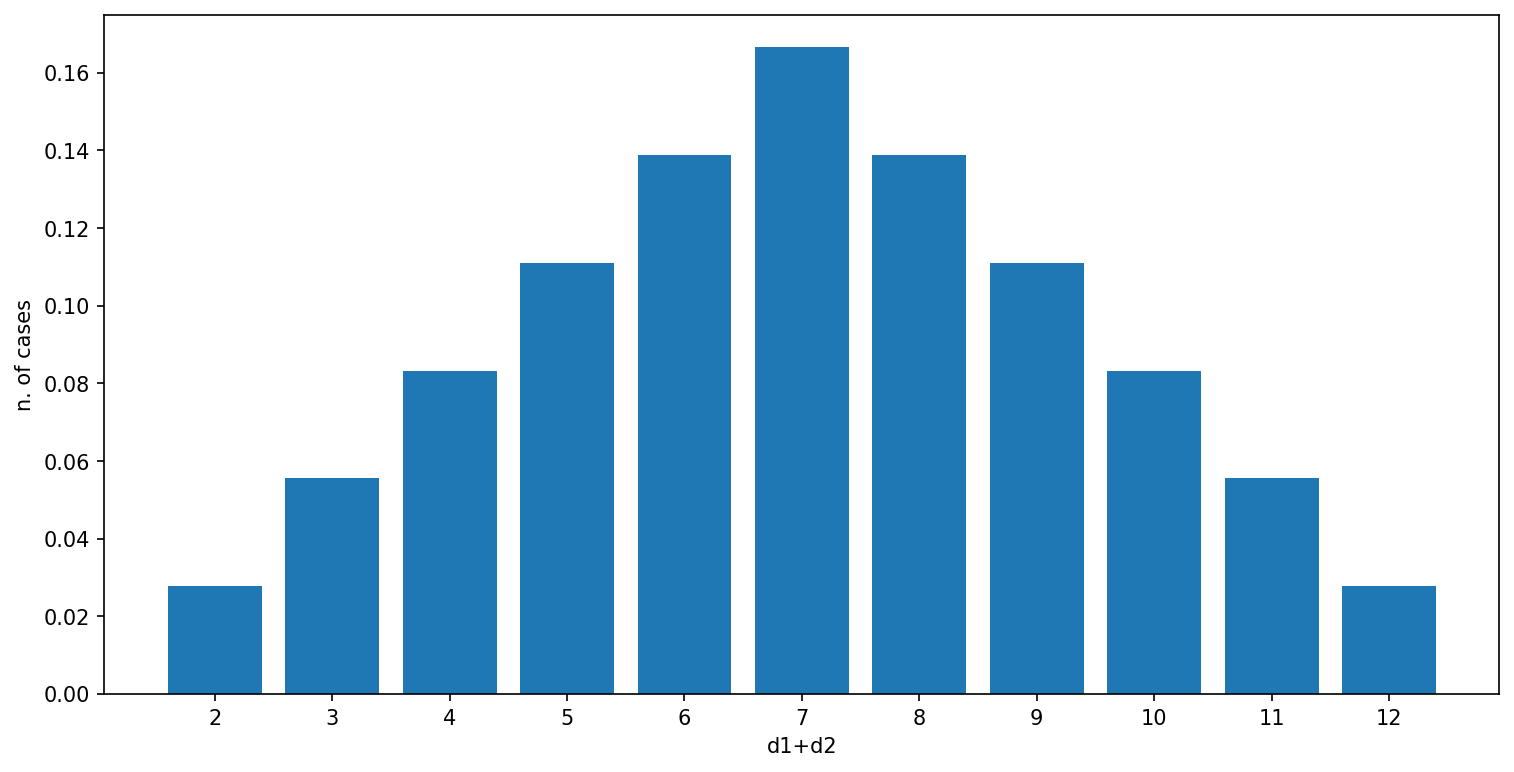

In [11]:
fig, ax = plt.subplots(figsize=(12,6), dpi=150)
plt.xlabel('d1+d2')
plt.ylabel('n. of cases')
plt.bar(sum_values, probs)
ax.set_xticks(sum_values)
plt.show()

Ripetiamo lo stesso calcolo per la somma di 3 dadi.

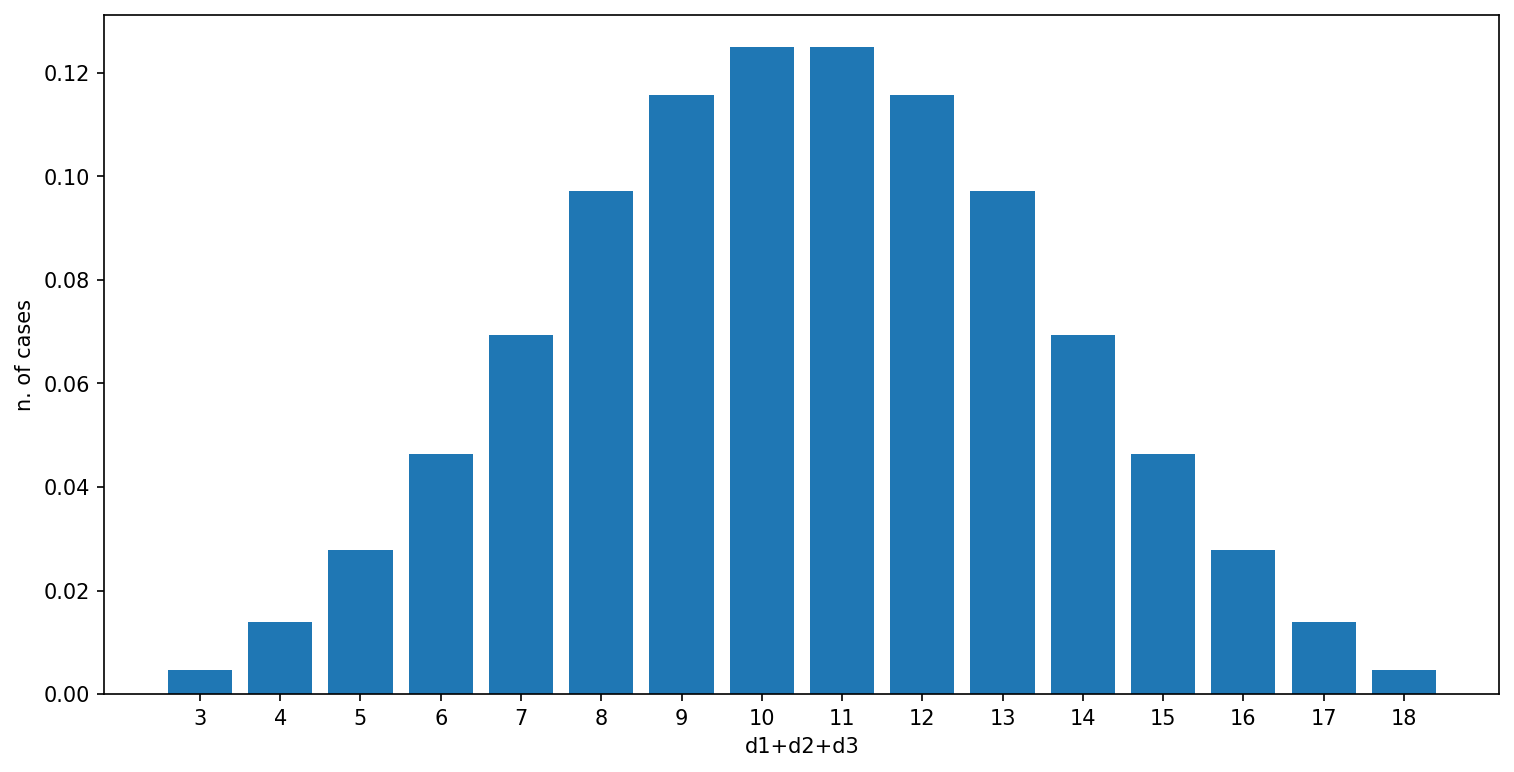

In [12]:
dice = pd.DataFrame(columns=['d1', 'd2', 'd3'])
dice = dice.astype({'d1': int, 'd2': int, 'd3': int})
dice_values = range(1,7)
for d1 in dice_values:
    for d2 in dice_values:
        for d3 in dice_values:
            dice=dice.append(dict(d1=d1, d2=d2, d3=d3),ignore_index=True)
dice['sum']=dice['d1']+dice['d2']+dice['d3']
sum_values = dice['sum'].unique()
counts = dice.groupby(['sum']).size()
probs = counts/counts.sum()
fig, ax = plt.subplots(figsize=(12,6), dpi=150)
plt.xlabel('d1+d2+d3')
plt.ylabel('n. of cases')
plt.bar(sum_values, probs)
ax.set_xticks(sum_values)
plt.show()

Da notare: maggiore è il numero di variabili casuali che si somma, più la distribuzione di probabilità prende la forma di una campana!

# Limiti della probabilità classica

La probabilità classica si applica solo in casi particolarmente semplici dotati di simmetrie esatte. Non è applicabile a casi senza simmetrie, oppure a casi realistici, nei quali necessariamente ogni simmetria può essere solo approssimativa.

# Spunto per esercizi

* Ripetere l'esercizio di cui sopra con un 3 [dati da *Dungeon and Dragons*](https://www.dieharddice.com/pages/d-d-dice-explained) a 10 o 12 facce.
* Usando la probabilità classica, calcolare la probabilità che, tra $N$ contatti su Facebook, almeno uno abbia il compleanno oggi (in prima approssimazione, si può trascurare chi è nato il 29/2).
* Usando la probabilità classica, calcolare la probabilità di fare ambo, terno, quaterna e cinquina al lotto.